## Importing the libraries

In [128]:
from __future__ import print_function    #adds compatibility to Python2
import pandas as pd
import numpy as np

In [129]:
#using the inline backend
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [130]:
print("Matplotlib version:", mpl.__version__)

Matplotlib version: 3.1.3


In [131]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


## Importing the dataset

In [132]:
df_can = pd.read_excel("Canada.xlsx", sheet_name= "Canada by Citizenship", skiprows= range(20), skipfooter=2)

## Basic Operations and cleaning

In [133]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [134]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [135]:
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [136]:
df_can.shape

(195, 43)

## Clean the dataset to remove some columns which are not required

In [137]:
df_can.drop(['Type','Coverage','REG','AREA','DEV'], axis=1, inplace=True)

## Rename some columns 

In [138]:
df_can.rename(columns= {"OdName":"Country", "AreaName":"Continent", "RegName":"Region"}, inplace=True)

In [139]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


## Adding the Total column

In [140]:
df_can["Total"]=df_can.sum(axis=1)

In [141]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

## Indexing the dataset

In [142]:
df_can.set_index("Country", inplace=True)

Opposite of the set_index() function is reset_index() function.

In [143]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [144]:
df_can.index.name=None

In [145]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [146]:
df_can.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=195)

## For consistency, ensure that all column labels of type string.

In [147]:
all(isinstance(column, str) for column in df_can.columns)

False

## Converting Integer Column names into Strings

In [148]:
df_can.columns= list(map(str, df_can.columns))

In [149]:
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [150]:
years= list(map(str, range(1980,2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [151]:
# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

## Visualization using Histograms

In [152]:
#observing the NumPy histogram method
count, bin_edges= np.histogram(df_can['2013'])

print(count)   #frequency count
print(bin_edges)  #bin ranges  #default= 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


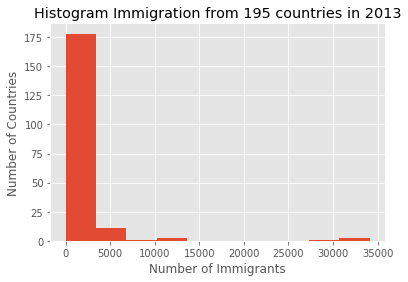

In [153]:
#plotting the graph
df_can['2013'].plot(kind='hist')

plt.title("Histogram Immigration from 195 countries in 2013")
plt.ylabel("Number of Countries")
plt.xlabel("Number of Immigrants")

plt.show()

In the above histogram, the bins are not aligned with the ticks on the horizontal axis. 

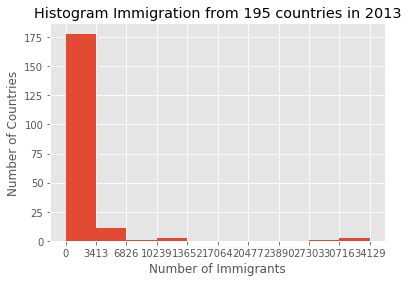

In [154]:
#aligning the bins with the ticks on the horizontal axis
#plotting the graph
df_can['2013'].plot(kind='hist', xticks=bin_edges)

plt.title("Histogram Immigration from 195 countries in 2013")
plt.ylabel("Number of Countries")
plt.xlabel("Number of Immigrants")

plt.show()

Immigration distribution for Denmark, Norway and Sweden from 1980 to 2013:

In [155]:
df_dns= df_can.loc[['Denmark','Norway','Sweden'], years]
df_dns

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


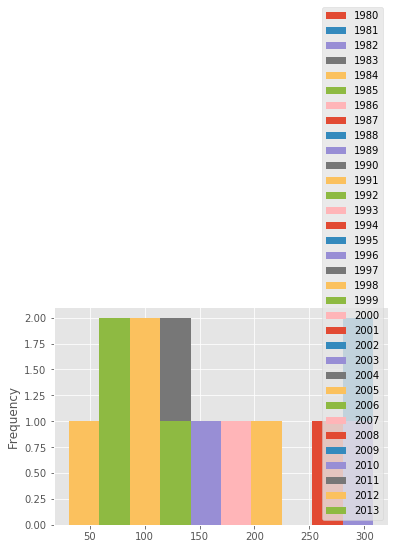

In [156]:
df_dns.plot(kind='hist')

This does not look good, since years are plotted on the horizontal axis instead of the population.

In [157]:
df_dns=df_dns.transpose()
df_dns

,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


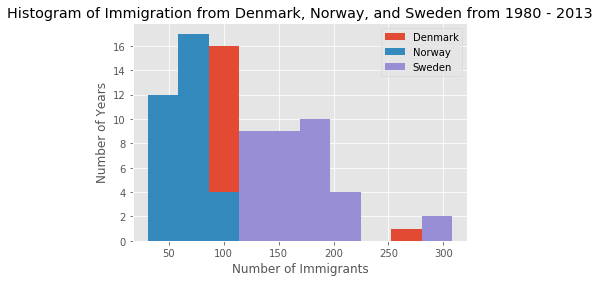

In [158]:
df_dns.plot(kind='hist')

plt.title("Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013")
plt.ylabel("Number of Years")
plt.xlabel("Number of Immigrants")

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:
* increase the bin size to 15 by passing in `bins` parameter
* set transparency to 60% by passing in `alpha` paramemter
* label the x-axis by passing in `x-label` paramater
* change the colors of the plots by passing in `color` parameter

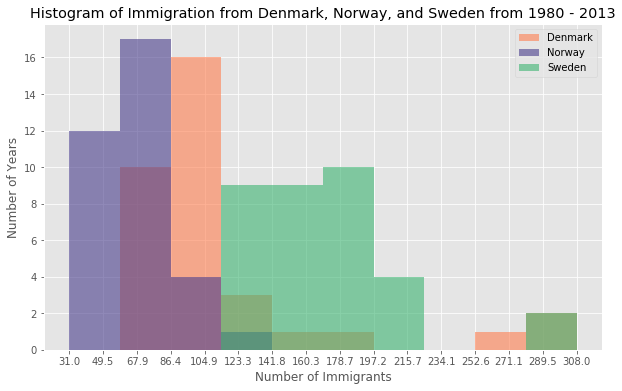

In [159]:
count, bin_edges= np.histogram(df_dns, 15)  #specifying the number of bins

df_dns.plot(kind='hist',xticks= bin_edges,figsize=(10,6),alpha=0.6,color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title("Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013")
plt.ylabel("Number of Years")
plt.xlabel("Number of Immigrants")

plt.show()

If we do no want the plots to overlap each other, we can stack them using the stacked paramemter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the xlim paramater, as show below.

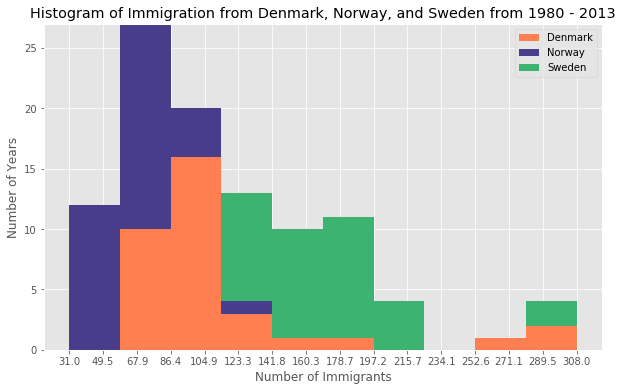

In [160]:
xmin= bin_edges[0]-10   #setting the lower limit on the horizontal axis
xmax= bin_edges[-1]+10  #setting the upper limit on the horizontal axis


df_dns.plot(kind='hist',xticks= bin_edges,figsize=(10,6),stacked=True,
            color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title("Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013")
plt.ylabel("Number of Years")
plt.xlabel("Number of Immigrants")

plt.show()

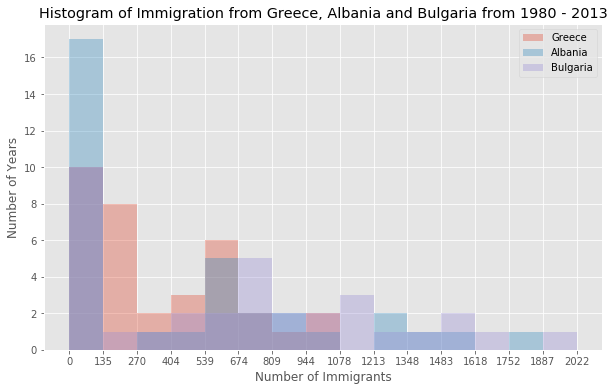

In [161]:
#Immigration distribution for Greece, Albania and Bulgaria from 1980 to 2013:
df_gab= df_can.loc[['Greece','Albania','Bulgaria'], years]
df_gab= df_gab.transpose()

count, bin_edges= np.histogram(df_gab, 15)

df_gab.plot(kind='hist', xticks= bin_edges, bins=15, alpha=0.35, figsize=(10,6))


plt.title('Histogram of Immigration from Greece, Albania and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()